In [0]:
import pandas as pd
pd.set_option('display.max_columns',100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd '/content/drive/My Drive'

/content/drive/My Drive


In [0]:
#Load the data
data = pd.read_table('WhatsApp Chat with NLP 100 Hours Batch 2.txt',sep='\t')

In [5]:
#View the attributes of the files loaded
data.head()

,"11/12/19, 11:38 AM - +91 6302 217 120 created group ""NLP 100 Hours Batch-2"""
0,"11/19/19, 3:46 PM - +91 90348 50345: Drive lin..."
1,"11/19/19, 3:49 PM - +91 82475 90372: Me also w..."
2,"11/19/19, 3:56 PM - +91 94378 01901: It will b..."
3,"11/19/19, 3:56 PM - +91 90900 09356: 👍"
4,"11/19/19, 4:01 PM - +91 72055 31464: Can I ple..."


In [6]:
#Set the column name to the text
data.columns=['Text']
data.head()

,Text
0,"11/19/19, 3:46 PM - +91 90348 50345: Drive lin..."
1,"11/19/19, 3:49 PM - +91 82475 90372: Me also w..."
2,"11/19/19, 3:56 PM - +91 94378 01901: It will b..."
3,"11/19/19, 3:56 PM - +91 90900 09356: 👍"
4,"11/19/19, 4:01 PM - +91 72055 31464: Can I ple..."


In [0]:
#Function to check if the data starts with date or not
import re
def startsWithDate(s):
    pattern = '^([0-9]{1,2})(\/)([0-9]{1,2})(\/)([0-9]{2,4},)'
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [0]:
#Function to check if the author name is there or not 

def startsWithAuthor(s):
    patterns = [
              '([\w]+):',
              '([\w]+[\s]+[\w]+):',
              '([\w]+[\s]+[\w]+[\s]+[\w]+):',
              '([+]\d{2} \d{5} \d{5}):',
              '([+]\d{2} \d{3} \d{3} \d{4}):',
              '([+]\d{2} \d{4} \d{7})'
            ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [0]:
#Function to extract the data
def ExtractData(text):
    splitLine = text.split(" - ")
    dateTime = splitLine[0]
    date,time = dateTime.split(", ")
    time1  = time.split(" ")[0]
    am_pm = time.split(" ")[1]
    message = ' '.join(splitLine[1:])
    if startsWithAuthor(message):
        splitMessage = message.split(': ')
        author = splitMessage[0]
        message = ' '.join(splitMessage[1:])
    else:
        author=None
    
    return date,time1,am_pm,author,message

In [0]:
parsedData = []
filepath = 'WhatsApp Chat with NLP 100 Hours Batch 2.txt'
with open(filepath,encoding = 'utf-8') as fp:
    fp.readline()
    messageBuffer=[]
    date,time,am_pm,author=None,None,None,None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if startsWithDate(line):
            if len(messageBuffer) > 0:
                parsedData.append([date,time,am_pm,author,' '.join(messageBuffer)])
                messageBuffer.clear()
                date,time,am_pm,author,message =ExtractData(line)
                messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [11]:
#Create the dataset of the pandas dataframe
df =pd.DataFrame(parsedData,columns=['Date','Time','AM/PM','Author','Message'])
df = df[1:]
df.head()

,Date,Time,AM/PM,Author,Message
1,11/19/19,4:02,PM,+91 99875 07468,Same here I cud t attend .. office issues
2,11/19/19,4:10,PM,+91 81054 54221,"I think there is ""view recordings"" section is ..."
3,11/19/19,4:11,PM,+91 81054 54221,Only theory... Try to catch next session becau...
4,11/19/19,4:12,PM,+91 72055 31464,Sure sure
5,11/19/19,4:12,PM,+91 72055 31464,Thanks for the note


In [12]:
#EDA Section Starts from here.
df.tail()

,Date,Time,AM/PM,Author,Message
1986,1/27/20,10:47,PM,+91 89896 40838,Top users you mean members with high number of...
1987,1/27/20,10:47,PM,AVI,Yes
1988,1/27/20,10:47,PM,+91 89896 40838,Yess done
1989,1/27/20,10:47,PM,+91 89896 40838,But contact was not saved
1990,1/27/20,10:47,PM,+91 89896 40838,Soo got the numbers


In [13]:
df.describe()

,Date,Time,AM/PM,Author,Message
count,1990,1990,1990,1936,1990
unique,66,592,2,60,1656
top,1/21/20,10:45,PM,AVI,<Media omitted>
freq,110,17,1462,166,182


In [14]:
df['Letter_Count'] = df['Message'].apply(lambda s:len(s))
df['Word_Count'] = df['Message'].apply(lambda s:len(s.split(' ')))
df.head()

,Date,Time,AM/PM,Author,Message,Letter_Count,Word_Count
1,11/19/19,4:02,PM,+91 99875 07468,Same here I cud t attend .. office issues,41,9
2,11/19/19,4:10,PM,+91 81054 54221,"I think there is ""view recordings"" section is ...",117,22
3,11/19/19,4:11,PM,+91 81054 54221,Only theory... Try to catch next session becau...,72,13
4,11/19/19,4:12,PM,+91 72055 31464,Sure sure,9,2
5,11/19/19,4:12,PM,+91 72055 31464,Thanks for the note,19,4


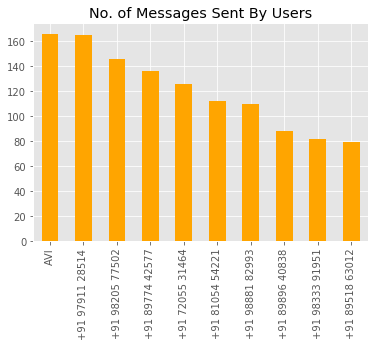

In [15]:
#Top 10 Senders
counts = df['Author'].value_counts()[:10]
counts.plot(kind='bar',title="No. of Messages Sent By Users", color ='orange')

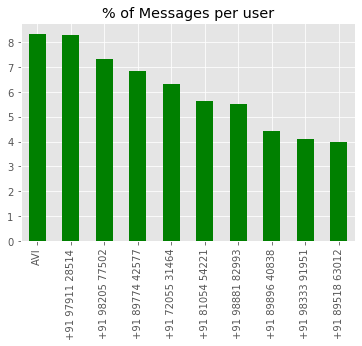

In [16]:
#Top 10 Senders in Proportion
prop = round(df['Author'].value_counts()[:10]/len(df)*100,2)
prop.plot(kind='bar',title='% of Messages per user',color='green')

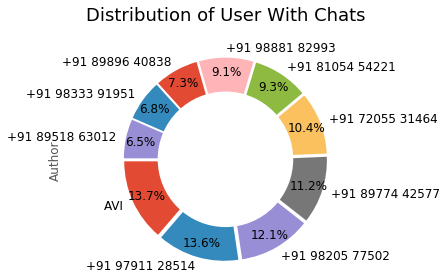

In [17]:
#Proportion of Messages sent by Users(Pie Chart)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

user=df.groupby('Author')['Author'].count().nlargest(10)

def user_chat_pie(user):
    fig, ax = plt.subplots()
    explodex = []
    for i in np.arange(len(user)):
        explodex.append(0.05)
    ax = user.plot(kind='pie', fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85, explode = explodex)
    inner_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(inner_circle)
    ax.axis('equal')  
    ax.set_title("Distribution of User With Chats\n", fontsize=18)
    plt.tight_layout()
    plt.show()
   #plt.savefig('pie.png',bbox_inches='tight')
user_chat_pie(user)



Text(0, 0.5, 'No of Messages')

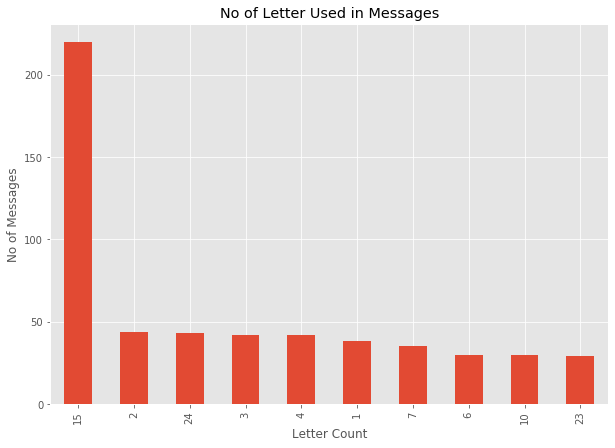

In [18]:
#No of Letters in a Messages
plt.figure(figsize=(10,7))
no_of_letter = df['Letter_Count'].value_counts()
no_of_letter=no_of_letter[:10]
no_of_letter.plot(kind='bar', title='No of Letter Used in Messages')
plt.xlabel("Letter Count")
plt.ylabel("No of Messages")

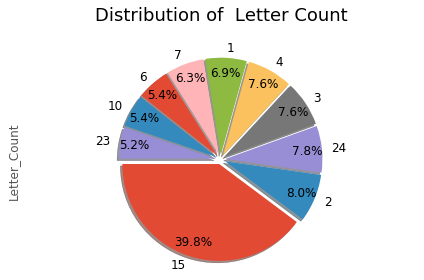

In [19]:
#Proportion of No of Letters in  Message
def pie_chart_plot(no_of_letter):
    fig,ax = plt.subplots()
    explodex =[]
    for i in np.arange(len(no_of_letter)):
        explodex.append(0.05)
    ax = no_of_letter.plot(kind='pie',shadow=True, fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85, explode = explodex)
    ax.axis('equal')  
    ax.set_title("Distribution of  Letter Count\n", fontsize=18)
    plt.tight_layout()
    plt.show()
   
pie_chart_plot(no_of_letter)

Text(0, 0.5, 'No of Messages')

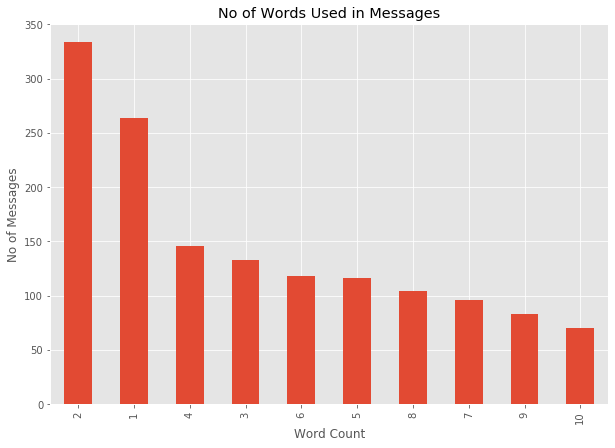

In [20]:
#Distribution of Word Counts
plt.figure(figsize=(10,7))
no_of_words = df['Word_Count'].value_counts()
no_of_words=no_of_words[:10]
no_of_words.plot(kind='bar', title='No of Words Used in Messages')
plt.xlabel("Word Count")
plt.ylabel("No of Messages")

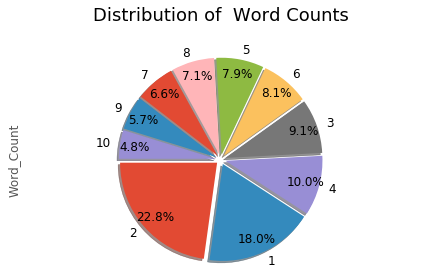

In [21]:
#Proportion of No of Words in  Message
def pie_chart_plot(no_of_words):
    fig,ax = plt.subplots()
    explodex =[]
    for i in np.arange(len(no_of_words)):
        explodex.append(0.05)
    ax = no_of_words.plot(kind='pie',shadow=True, fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85, explode = explodex)
    ax.axis('equal')  
    ax.set_title("Distribution of  Word Counts\n", fontsize=18)
    plt.tight_layout()
    plt.show()

pie_chart_plot(no_of_words)

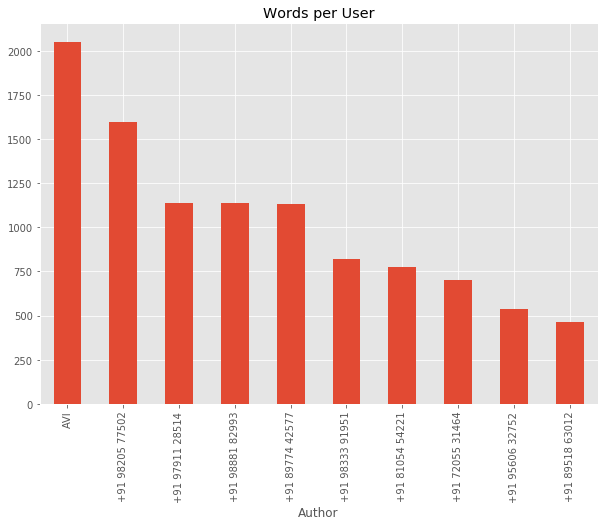

In [22]:
#Distribution of Users with word counts
plt.figure(figsize=(10,7))
word_counts_per_user = df.groupby(['Author'])['Word_Count'].sum().nlargest(10)
word_counts_per_user.plot(kind='bar',title='Words per User')

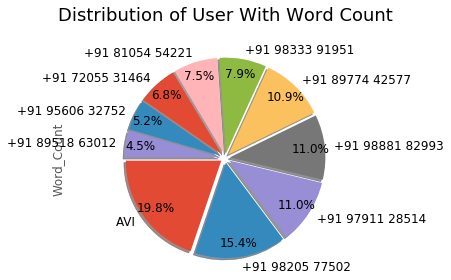

In [23]:
#Distribution per User(Word Counts)
def pie_chart_plot(word_count):
    fig,ax = plt.subplots()
    explodex =[]
    for i in np.arange(len(word_count)):
        explodex.append(0.05)
    ax = word_count.plot(kind='pie',shadow=True, fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85, explode = explodex)
    ax.axis('equal')  
    ax.set_title("Distribution of User With Word Count\n", fontsize=18)
    plt.tight_layout()
    plt.show()
    
pie_chart_plot(word_counts_per_user)

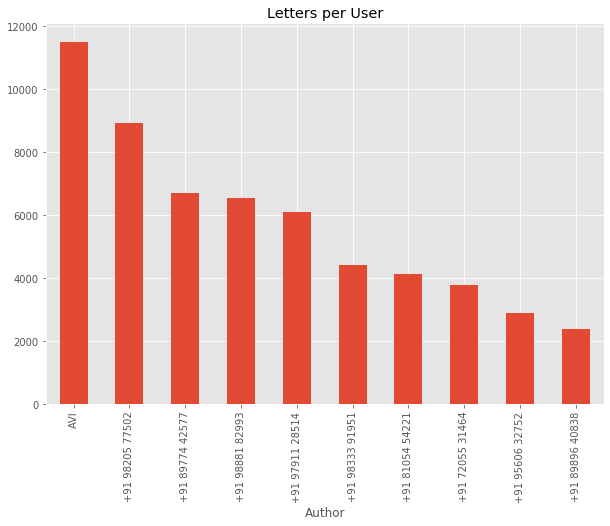

In [24]:
#Distribution of Users with Letter counts
plt.figure(figsize=(10,7))
letter_counts_per_user = df.groupby(['Author'])['Letter_Count'].sum().nlargest(10)
letter_counts_per_user.plot(kind='bar',title='Letters per User')

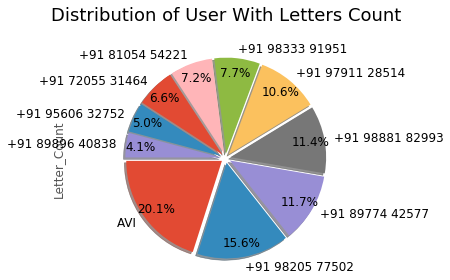

In [25]:
#Distribution per User(Letter Counts)
def pie_chart_plot(letter_count):
    fig,ax = plt.subplots()
    explodex =[]
    for i in np.arange(len(letter_count)):
        explodex.append(0.05)
    ax = letter_count.plot(kind='pie',shadow=True, fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85, explode = explodex)
    ax.axis('equal')  
    ax.set_title("Distribution of User With Letters Count\n", fontsize=18)
    plt.tight_layout()
    plt.show()
    
pie_chart_plot(letter_counts_per_user)

In [0]:
import emoji
def extract_emoji(str1):
    return ''.join(c for c in str1 if c in emoji.UNICODE_EMOJI )

In [27]:
df['EMOJI'] = df['Message'].apply(extract_emoji)
df.head(20)

,Date,Time,AM/PM,Author,Message,Letter_Count,Word_Count,EMOJI
1,11/19/19,4:02,PM,+91 99875 07468,Same here I cud t attend .. office issues,41,9,
2,11/19/19,4:10,PM,+91 81054 54221,"I think there is ""view recordings"" section is ...",117,22,
3,11/19/19,4:11,PM,+91 81054 54221,Only theory... Try to catch next session becau...,72,13,
4,11/19/19,4:12,PM,+91 72055 31464,Sure sure,9,2,
5,11/19/19,4:12,PM,+91 72055 31464,Thanks for the note,19,4,
6,11/19/19,4:12,PM,+91 81054 54221,😊,1,1,😊
7,11/19/19,4:13,PM,+91 98333 91951,Not everyone has access to view recording,41,7,
8,11/19/19,4:14,PM,+91 81054 54221,Ohh okay ... Got it 😊,21,6,😊
9,11/19/19,4:14,PM,+91 93993 84457,I think you can access same day only,36,8,
10,11/19/19,4:15,PM,+91 90321 13803,"Shubham, As per today's class , prudvi said h...",135,24,


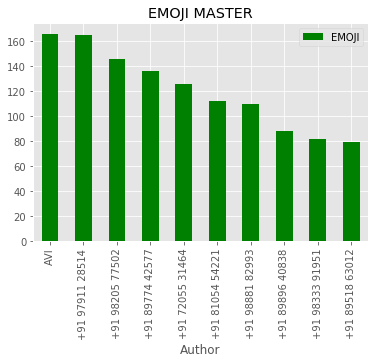

In [28]:
EMOJIS_PER_USER = df.groupby('Author').count()['EMOJI'].reset_index()
EMOJIS_PER_USER.sort_values('EMOJI',ascending=False,inplace=True)
EMOJIS_PER_USER[:10].plot('Author','EMOJI',kind='bar',title='EMOJI MASTER',color='green')

In [29]:
import collections
import emoji
df["Author"].unique()
emoji_ctr = collections.Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in df.iterrows():
        emojis_found = r.findall(row["Message"])
        for emoji_found in emojis_found:
            emoji_ctr[emoji_found] += 1
for item in emoji_ctr.most_common(10):
    print(item[0] + " - " + str(item[1]))

👍 - 77
🏻 - 31
😊 - 23
😂 - 19
😅 - 13
😀 - 11
😁 - 10
😜 - 8
🏼 - 4
🤟 - 4


**DATE TIME VISUALIZATION**

<Figure size 1440x504 with 0 Axes>

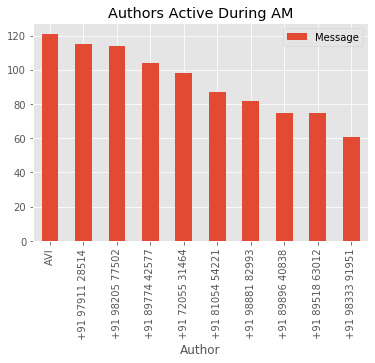

In [30]:
#Users Activity By Time
plt.figure(figsize=(20,7))
active_time = df[['AM/PM','Message','Author']]
active_time = active_time.groupby(['AM/PM','Author']).count().reset_index()
active_time[active_time['AM/PM']=='AM']
active_time.sort_values('Message',ascending=False)[:10].plot(x='Author',kind='bar',title='Authors Active During AM')


<Figure size 720x504 with 0 Axes>

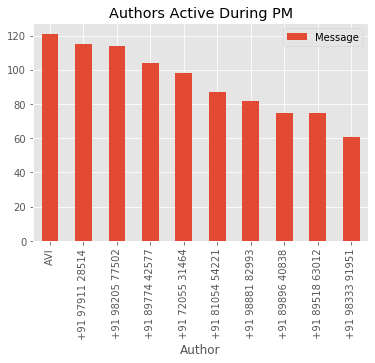

In [31]:
plt.figure(figsize=(10,7))
active_time = df[['AM/PM','Message','Author']]
active_time = active_time.groupby(['AM/PM','Author']).count().reset_index()
active_time[active_time['AM/PM']=='PM']
active_time = active_time.sort_values('Message',ascending=False)[:10]
active_time.plot(x='Author',kind='bar',title="Authors Active During PM")

In [0]:
#DateWise Count of Messages
datewise_message_counts = df.groupby(['Date'],sort=False)['Date'].value_counts().nlargest(10)

Text(0, 0.5, 'No of Messages')

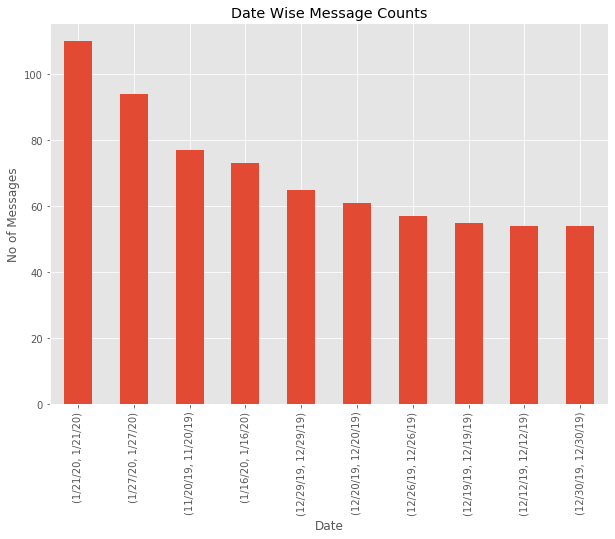

In [33]:
plt.figure(figsize=(10,7))
datewise_message_counts.plot(kind='bar',title='Date Wise Message Counts')
plt.xlabel("Date")
plt.ylabel("No of Messages")

In [0]:
datewise_message_counts = df.groupby(['Date'],sort=False)['Date'].value_counts()
dates = df.groupby('Date',sort=False)['Date'].count()
# dates.sort_values(ascending=False)
# dates[:10]

In [0]:
def plot_linechart(data):
    plt.figure(figsize=(10,7))
    ax= data.plot(kind='line',color='green',fontsize=15)
    ax.set_title('Distribution of Date with No of Messages',fontsize=18)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Messages", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

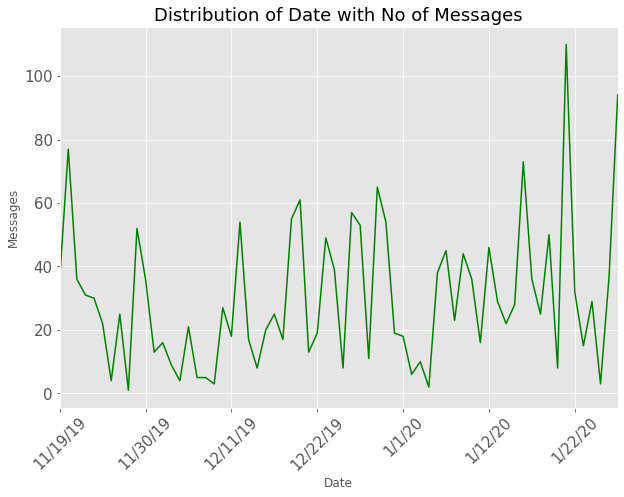

In [36]:
plot_linechart(dates)

In [0]:
# import nltk
# # nltk.download('punkt')
# # nltk.download('averaged_perceptron_tagger')
# # nltk.download('universal_tagset')

In [0]:
from nltk import pos_tag
from nltk import word_tokenize
from collections import Counter
def get_pos_tags(data):
  #Lowercase the data
  lower_case = data.lower()
  #Tokenize the data
  tokens = word_tokenize(lower_case)
  #Tag the tokens
  tags = pos_tag(tokens,tagset='universal')
  counts = Counter(tag for word,tag in tags if tag in ('NOUN','PRON','VERB','ADV',"ADJ"))
  return counts

In [39]:
tokens_counts = df['Message'].apply(get_pos_tags).sum()
tokens_counts

Counter({'ADJ': 1430, 'ADV': 1082, 'NOUN': 5419, 'PRON': 985, 'VERB': 4024})

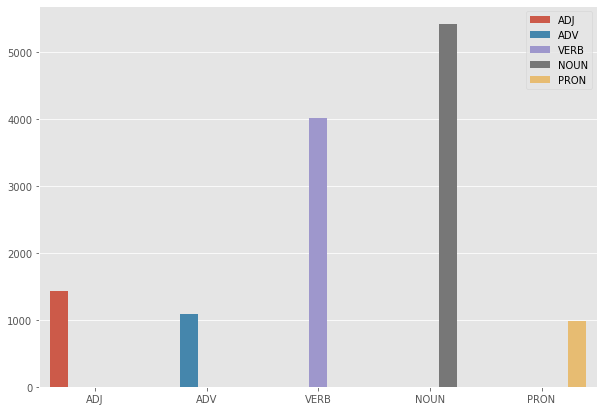

In [40]:
labels = list(tokens_counts.keys())
values = list(tokens_counts.values())
import seaborn as sns
plt.figure(figsize=(10,7))
sns.barplot(x=labels,y=values,hue=labels)

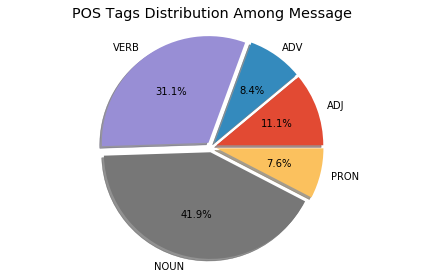

In [41]:
#POS TAGS DISTRIBUTIONS IN CHATS
labels = list(tokens_counts.keys())
values = list(tokens_counts.values())
fig,ax1 = plt.subplots()
explode = []
for i in np.arange(len(values)):
        explode.append(0.05)

ax1.pie(values,labels = labels,autopct='%1.1f%%',shadow=True,explode=explode)
ax1.axis('equal')
plt.title("POS Tags Distribution Among Message")
plt.tight_layout()
plt.show()

**More Visualizations are pending.Pending Task from here.**

Pending Tasks


1.   Hour Wise Activity(Most Active Time)
2.   Hour Wise User Activity(Active Active User Time)
3.   Most Active Month
   




In [0]:
# df['DATETIME'] = df['Date']+" "+df['Time']+" "+df['AM/PM']
# # df['Hour']= df['Time'].str.split(":")[0]
# df.head()


In [0]:
# time1 ='4:02'

# def get_hours(time):
#   hour = time.split(":")[0]
#   return hour
# h = get_hours(time1)
# h

In [0]:
# # df['Hour'] = df['Time'].apply(get_hours)
# # df.head()
# df['DATE_TIME'] = pd.to_datetime(df['DATETIME'])


In [0]:
# df['DATE_TIME'].value_counts()


In [0]:
# df['mention'] = df['Message'].str.findall(r'@([^:\s]+)')

In [0]:
# df.head()

In [0]:
# # df[len(df['mention'])>0]
# index = df.index[df.astype(str)['mention'] == '[]']
# index
# mentionsdata = df.drop(index)

In [0]:
# mentionsdata['mention'].value_counts()

In [0]:
#Visualizations
# #1) Total Number of Words Used by Author
# words_per_user = df[['Author','Word_Count']].groupby('Author').sum()
# words_per_user = words_per_user.sort_values('Word_Count',ascending=False)
# top_users = words_per_user.head(10)
# #Plot the bar plot
# top_users.plot(kind='bar',title='Words Used By Users',legend=True)

In [0]:
# #Letter used by per user
# letters_per_user = df[['Author','Letter_Count']].groupby('Author').sum()
# letters_per_user = letters_per_user.sort_values('Letter_Count',ascending=False)
# top_users = letters_per_user.head(10)
# #Plot the bar plot
# top_users.plot(kind='bar',title='Letters Used By Users',legend=True,color='green')